In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('revenue_prediction.csv')

In [3]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [4]:
df.drop(['Id'],axis=1,inplace=True)

In [5]:
df

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...
95,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [6]:
# data cleaning

In [7]:
df.isna().sum()

Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# check outliers

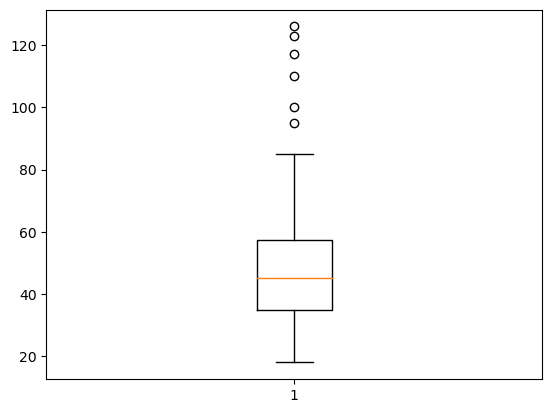

In [10]:
plt.boxplot(df['No_Of_Item'])
plt.show()

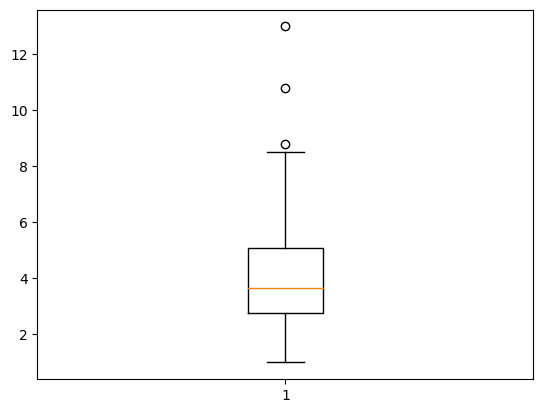

In [11]:
plt.boxplot(df['Order_Placed'])
plt.show()

In [12]:
# to reduce the impact of outlier , we do edge cutting

In [13]:
p1=df['No_Of_Item'].quantile(0.01)
p2=df['No_Of_Item'].quantile(0.99)
print(p1,p2)

18.99 123.03000000000002


In [14]:
df['No_Of_Item'][df['No_Of_Item']<p1]=p1
df['No_Of_Item'][df['No_Of_Item']>p2]=p2

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_9516\139431520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_Of_Item'][df['No_Of_Item']<p1]=p1


In [15]:
p1=df['Order_Placed'].quantile(0.01)
p2=df['Order_Placed'].quantile(0.99)

In [16]:
df['Order_Placed'][df['Order_Placed']<p1]=p1
df['Order_Placed'][df['Order_Placed']>p2]=p2

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_9516\308016592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Placed'][df['Order_Placed']<p1]=p1
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_9516\308016592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Placed'][df['Order_Placed']>p2]=p2


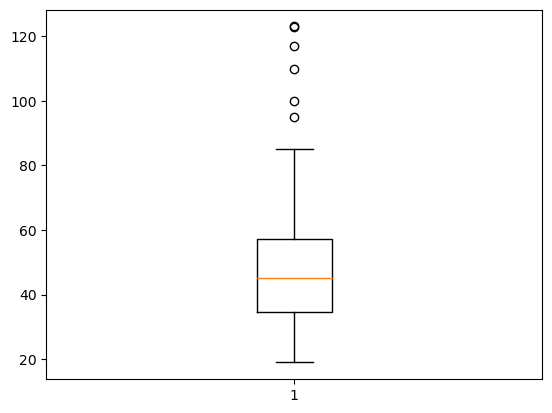

In [17]:
plt.boxplot(df['No_Of_Item'])
plt.show()

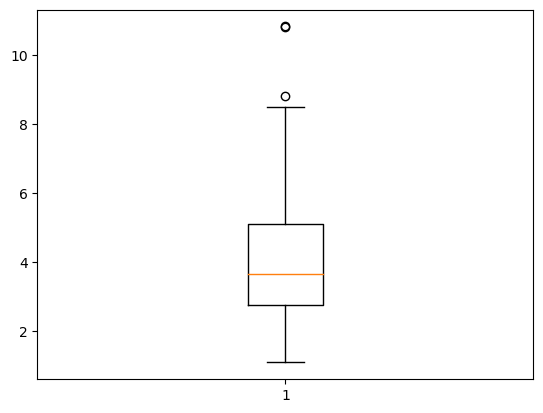

In [18]:
plt.boxplot(df['Order_Placed'])
plt.show()

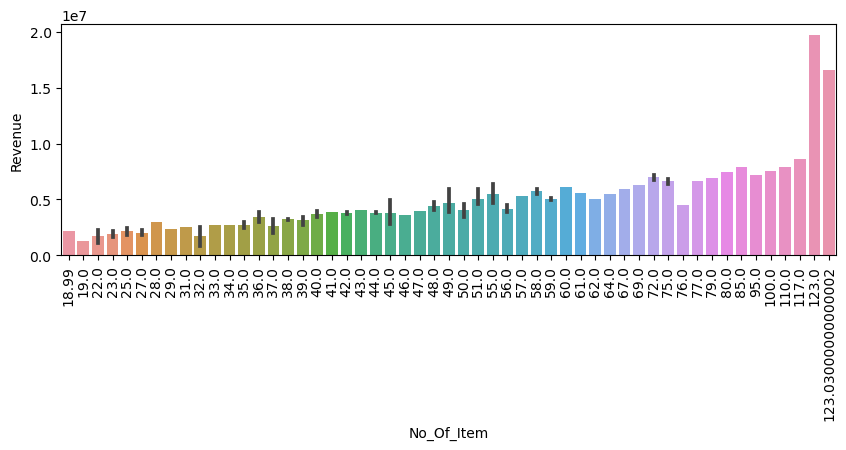

In [19]:
plt.figure(figsize=(10,3))
sns.barplot(x='No_Of_Item',y='Revenue',data=df)
plt.xticks(rotation=90)
plt.show()

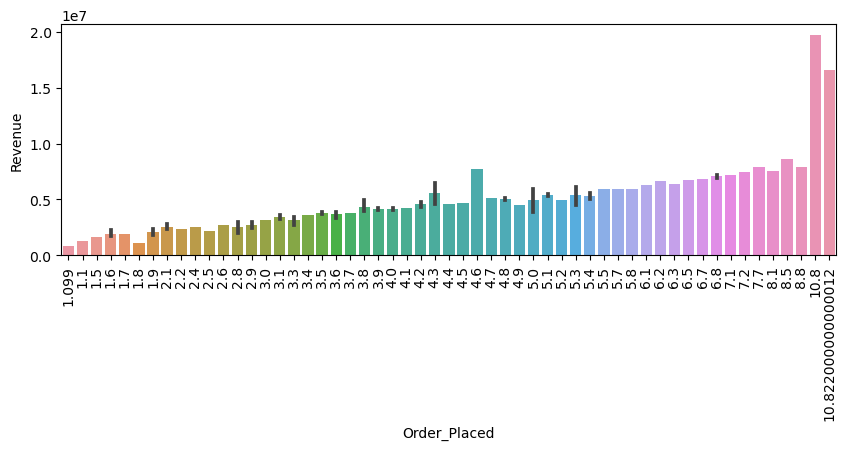

In [20]:
plt.figure(figsize=(10,3))
sns.barplot(x='Order_Placed',y='Revenue',data=df)
plt.xticks(rotation=90)
plt.show()

In [21]:
# label encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [25]:
df

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,40,1,12,0,55.00,5.5,5953753
1,14,0,19,1,72.00,6.8,7223131
2,16,1,5,4,25.00,1.9,2555379
3,60,1,11,2,18.99,2.5,2175511
4,68,1,13,3,48.00,4.2,4816715
...,...,...,...,...,...,...,...
95,96,0,11,0,19.00,1.1,1270499
96,47,1,19,0,75.00,6.3,6412623
97,35,1,19,1,77.00,6.2,6694797
98,41,1,17,4,25.00,2.1,2344689


In [26]:
# feature selection

In [27]:
df.corr()

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
Name,1.000000,0.026113,0.088829,-0.112822,0.251078,0.249703,0.246611
Franchise,0.026113,1.000000,-0.129565,0.119937,0.008786,0.024776,0.048881
Category,0.088829,-0.129565,1.000000,0.072629,0.075159,0.053891,-0.036955
City,-0.112822,0.119937,0.072629,1.000000,-0.108717,-0.122063,-0.162427
No_Of_Item,0.251078,0.008786,0.075159,-0.108717,1.000000,0.977710,0.890275
Order_Placed,0.249703,0.024776,0.053891,-0.122063,0.977710,1.000000,0.918832
Revenue,0.246611,0.048881,-0.036955,-0.162427,0.890275,0.918832,1.000000


<Axes: >

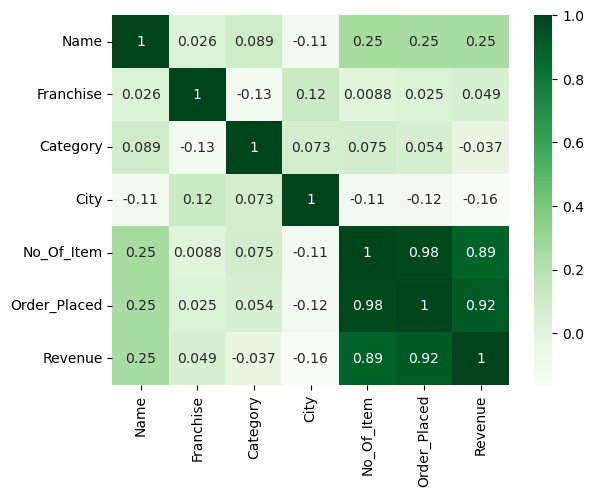

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [29]:
selected_col=['No_Of_Item','Order_Placed']

In [30]:
# split data into dependent and independent

In [31]:
x=df[selected_col]
x

,No_Of_Item,Order_Placed
0,55.00,5.5
1,72.00,6.8
2,25.00,1.9
3,18.99,2.5
4,48.00,4.2
...,...,...
95,19.00,1.1
96,75.00,6.3
97,77.00,6.2
98,25.00,2.1


In [32]:
y=df['Revenue']
y

0     5953753
1     7223131
2     2555379
3     2175511
4     4816715
       ...   
95    1270499
96    6412623
97    6694797
98    2344689
99    4567678
Name: Revenue, Length: 100, dtype: int64

In [33]:
# train test  split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [36]:
# model building

In [37]:
# Linear Regression model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [39]:
lin_model=LinearRegression()

In [40]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred=lin_model.predict(x_test)

In [42]:
mse=mean_squared_error(y_test,y_pred)
mse

345334182350.85156

In [43]:
rmse=np.sqrt(mse)
rmse

587651.4122767438

In [44]:
R2_lin=r2_score(y_test,y_pred)
R2_lin

0.8964459486115356

In [45]:
# Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt_model=DecisionTreeRegressor()

In [48]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
dt_pred=dt_model.predict(x_test)

In [50]:
R2_dt=r2_score(y_test,dt_pred)
R2_dt

0.9325921934011056

In [51]:
# Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf_model=RandomForestRegressor()

In [54]:
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
rf_pred=rf_model.predict(x_test)

In [56]:
R2_rf=r2_score(y_test,rf_pred)
R2_rf

0.9595337995388419

In [57]:
# compare the r2_score of all models

In [58]:
print('R2 score of linear regression model is :',R2_lin )
print('R2 score of Decision Tree Regressor is :',R2_dt )
print('R2 score of Random Forest Regressor  is :',R2_rf )

R2 score of linear regression model is : 0.8964459486115356
R2 score of Decision Tree Regressor is : 0.9325921934011056
R2 score of Random Forest Regressor  is : 0.9595337995388419


In [59]:
#R2 score of Random Forest Regressor  is highest, so we go with Random Forest Regressor model